In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [ ]:
ipl = pd.read_csv('ipl.csv')
ipl.head()

In [ ]:
 df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']

In [ ]:
from sklearn.preprocessing import LabelEncoder
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [ ]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

In [ ]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 55.8520 - val_loss: 22.2216
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.1584 - val_loss: 22.1355
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.2868 - val_loss: 22.0336
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2926 - val_loss: 22.1038
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 22.1063 - val_loss: 21.8644
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1173 - val_loss: 21.9121
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.1762 - val_loss: 22.1291
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1114 - val_loss: 21.9183
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.1436 - val_loss: 22.1426
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21.9854 - val_loss: 21.7827
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.0112 - val_loss: 22.4349
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

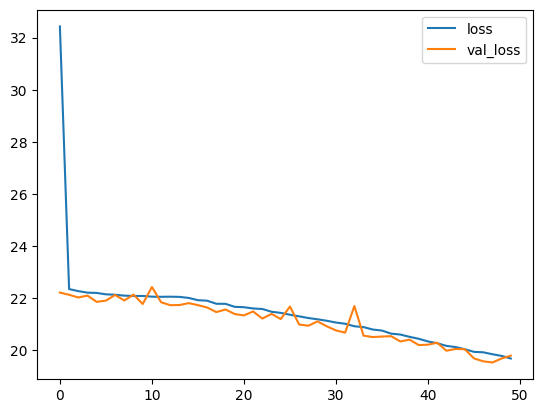

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step


20.294277325149064

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select BOWLING Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()



        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)

        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', index=13, options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Huss…

Dropdown(description='Select Bowler:', index=27, options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB J…

Button(description='Predict Score', style=ButtonStyle())

Output()